In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

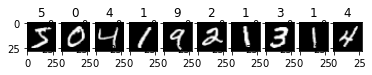

In [ ]:
fig,axs = plt.subplots(1,10)
for i in range(10):
  axs[i].imshow(x_train[i],cmap="gray")
  axs[i].set_title(y_train[i])

In [ ]:
x_train  = x_train/255
x_test = x_test/255

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape = (28,28)),
            keras.layers.Dense(128,activation="relu"),
            keras.layers.Dense(num_classes,activation="softmax")
        ])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2576 - accuracy: 0.9270
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9664
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9758
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9827
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9858
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9896
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0225 - accuracy: 0.9927
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [ ]:
model.fit(x_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 5s 2ms/step - loss: 0.2739 - accuracy: 0.9216 - val_loss: 0.1436 - val_accuracy: 0.9595
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9640 - val_loss: 0.0990 - val_accuracy: 0.9720
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9748 - val_loss: 0.0817 - val_accuracy: 0.9742
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0628 - accuracy: 0.9805 - val_loss: 0.0863 - val_accuracy: 0.9752
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0759 - val_accuracy: 0.9788
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0826 - val_accuracy: 0.9788
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0289 - accuracy: 0.9916 - val_loss: 0.0797 - val_accuracy:

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=20,validation_split=0.1)

Epoch 1/20
2700/2700 [==============================] - 8s 3ms/step - loss: 0.0100 - accuracy: 0.9964 - val_loss: 0.1125 - val_accuracy: 0.9793
Epoch 2/20
2700/2700 [==============================] - 8s 3ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.1185 - val_accuracy: 0.9793
Epoch 3/20
2700/2700 [==============================] - 8s 3ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.1108 - val_accuracy: 0.9808
Epoch 4/20
2700/2700 [==============================] - 7s 3ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.1114 - val_accuracy: 0.9797
Epoch 5/20
2700/2700 [==============================] - 7s 3ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.1062 - val_accuracy: 0.9802
Epoch 6/20
2700/2700 [==============================] - 7s 3ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.1170 - val_accuracy: 0.9787
Epoch 7/20
2700/2700 [==============================] - 7s 3ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.1324 - val_accuracy:

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{accuracy}-{val_accuracy}.h5",save_best_only=True)
model.fit(x_train,y_train,epochs=20,batch_size=20,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0741 - accuracy: 0.9778 - val_loss: 0.0828 - val_accuracy: 0.9758
Epoch 2/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0847 - val_accuracy: 0.9763
Epoch 3/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0814 - val_accuracy: 0.9775
Epoch 4/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0860 - val_accuracy: 0.9788
Epoch 5/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0817 - val_accuracy: 0.9778
Epoch 6/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.0841 - val_accuracy: 0.9795
Epoch 7/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0855 - val_accuracy:

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1337 - accuracy: 0.9782


[0.1337398886680603, 0.9782000184059143]

In [ ]:
model03 = keras.models.load_model("model-003-0.9868333339691162-0.9775000214576721.h5")

In [ ]:
model03.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9741


[0.08413850516080856, 0.9740999937057495]

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{accuracy}-{val_accuracy}.h5",save_best_only=True,monitor="val_accuracy")
model.fit(x_train,y_train,epochs=20,batch_size=20,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/20
2700/2700 [==============================] - 7s 2ms/step - loss: 0.2502 - accuracy: 0.9283 - val_loss: 0.1201 - val_accuracy: 0.9658
Epoch 2/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.1101 - accuracy: 0.9662 - val_loss: 0.0828 - val_accuracy: 0.9748
Epoch 3/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0736 - accuracy: 0.9774 - val_loss: 0.0754 - val_accuracy: 0.9790
Epoch 4/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.0755 - val_accuracy: 0.9778
Epoch 5/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0713 - val_accuracy: 0.9803
Epoch 6/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0776 - val_accuracy: 0.9787
Epoch 7/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0766 - val_accuracy:

In [ ]:
model018 = keras.models.load_model("model-018-0.9980740547180176-0.9835000038146973.h5")

In [ ]:
model018.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1144 - accuracy: 0.9777


[0.11444848775863647, 0.9776999950408936]

In [ ]:
history = model.fit(x_train,y_train,epochs=20,batch_size=20,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/20
2700/2700 [==============================] - 7s 2ms/step - loss: 0.2522 - accuracy: 0.9269 - val_loss: 0.1110 - val_accuracy: 0.9677
Epoch 2/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.1080 - accuracy: 0.9682 - val_loss: 0.0881 - val_accuracy: 0.9743
Epoch 3/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0760 - accuracy: 0.9766 - val_loss: 0.0773 - val_accuracy: 0.9770
Epoch 4/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0797 - val_accuracy: 0.9770
Epoch 5/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0722 - val_accuracy: 0.9800
Epoch 6/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0755 - val_accuracy: 0.9780
Epoch 7/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0770 - val_accuracy:

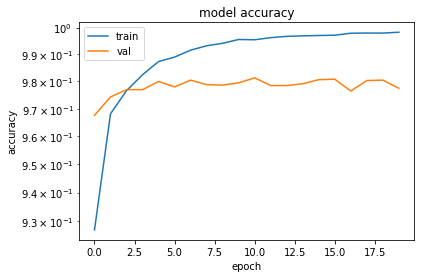

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.yscale('log')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

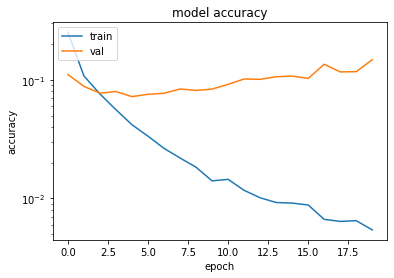

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.yscale('log')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()